# **COSC 442 - Assignment 2**

By:

* Amna Bubshait (A00723)
* Zahra Alshehabi (A00755)

**Introduction:**

Fuzzy logic is a mathematical framework for dealing with uncertainty and imprecision, which is the opposite of classical binary logic (true/false). Fuzzy logic allows variables to have degrees of truth, which makes it for real-world problems where data is often noisy. It is commonly used in AI and robotics for handling imprecise inputs and delivering human-like decisions.

**Problem:**

The purpose is to control a robot's movements in an uncertain environment with obstacles. In such a situation, the robot must make decisions (e.g., move forward, slow down, or stop) according to the obstacle's proximity. Since sensor data might be noisy or imprecise, fuzzy logic is reliable for modeling the robot's behavior without needing exact thresholds.

# **1. Fuzzy Logic System Design**

In [5]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.1 MB/s eta 0:00:00


In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Create fuzzy variables (input and output)
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')  # distance to obstacle in cm
speed = ctrl.Consequent(np.arange(0, 11, 1), 'speed')          # robot speed (0 to 10 units)

# Define fuzzy sets (linguistic labels) and membership functions

# Input: Distance (in cm)
distance['close'] = fuzz.trimf(distance.universe, [0, 0, 40])
distance['medium'] = fuzz.trimf(distance.universe, [20, 50, 80])
distance['far'] = fuzz.trimf(distance.universe, [60, 100, 100])

# Output: Speed
speed['stop'] = fuzz.trimf(speed.universe, [0, 0, 3])
speed['slow'] = fuzz.trimf(speed.universe, [2, 5, 8])
speed['fast'] = fuzz.trimf(speed.universe, [6, 10, 10])

# Define fuzzy rules
rule1 = ctrl.Rule(distance['close'], speed['stop'])         # If distance is close, then stop
rule2 = ctrl.Rule(distance['medium'], speed['slow'])        # If distance is medium, then go slow
rule3 = ctrl.Rule(distance['far'], speed['fast'])           # If distance is far, go fast
rule4 = ctrl.Rule(distance['close'] & distance['medium'], speed['stop'])  # Reinforce stop near obstacles
rule5 = ctrl.Rule(distance['medium'] & distance['far'], speed['slow'])    # Moderate speed for mid-range

# Create control system
speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
speed_sim = ctrl.ControlSystemSimulation(speed_ctrl)

# **2. Implementation**

Fuzzy sets and rules have been defined and control system instantiated.


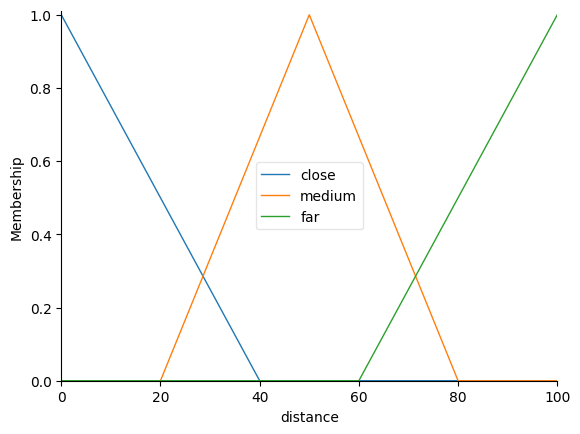

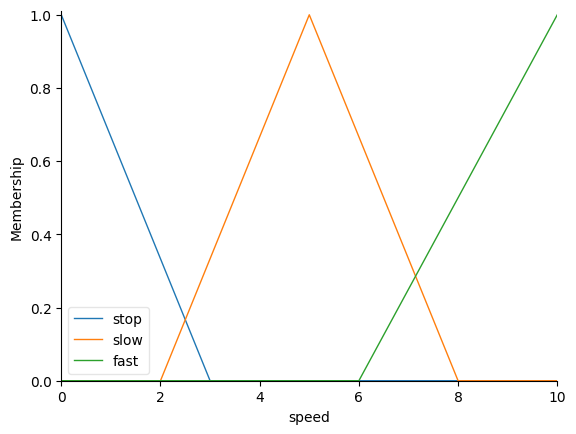

In [10]:
import matplotlib.pyplot as plt

# Plot membership functions for input and output
distance.view()
speed.view()

# Show fuzzy system created
print("Fuzzy sets and rules have been defined and control system instantiated.")

# **3. Testing and Results**


Test Results:
Distance (cm) → Speed (0–10)
-----------------------------
           10 →   1.05
           30 →   3.99
           50 →   5.00
           70 →   6.02
           90 →   8.60


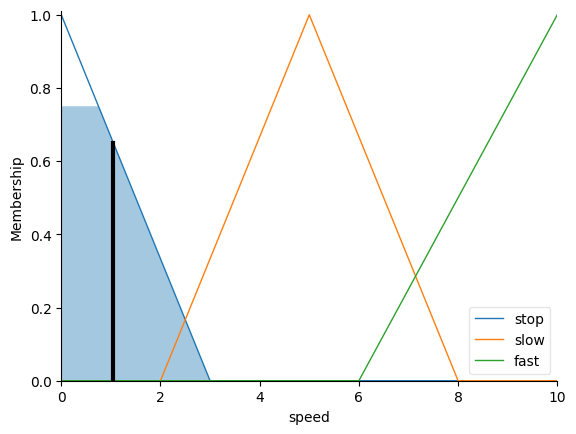

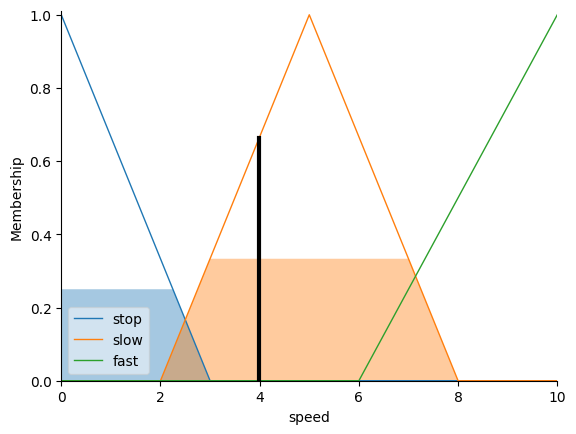

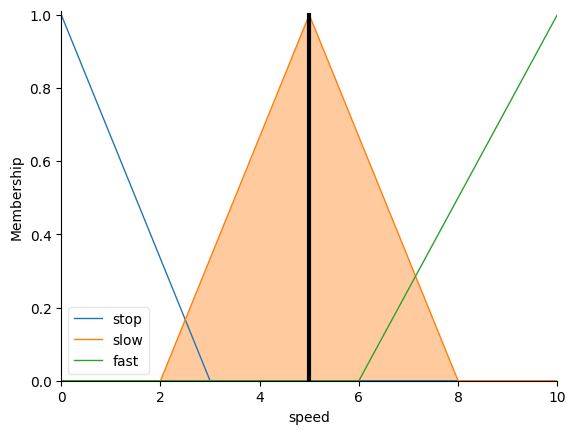

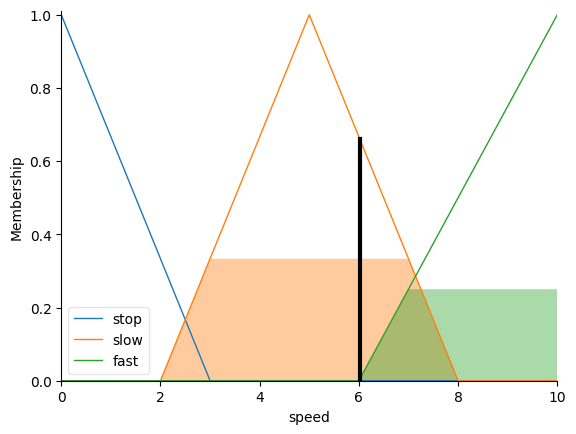

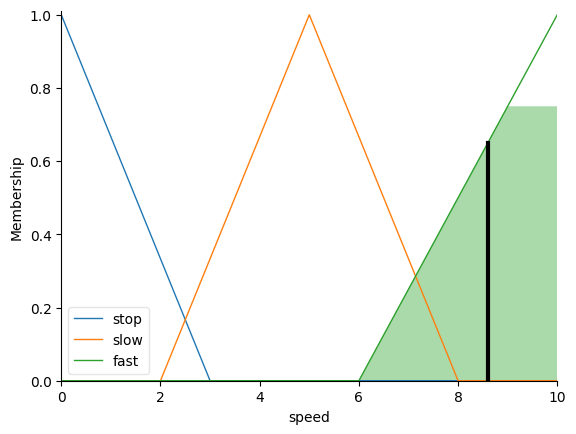

In [11]:
# Sample test inputs to evaluate fuzzy control
test_values = [10, 30, 50, 70, 90]  # in cm

print("\nTest Results:")
print("Distance (cm) → Speed (0–10)")
print("-----------------------------")
for d in test_values:
    speed_sim.input['distance'] = d
    speed_sim.compute()
    output = speed_sim.output['speed']
    print(f"{d:13} → {output:6.2f}")
    speed.view(sim=speed_sim)  # Optional: show inference result

**Conclusion:**

The fuzzy control system responded correctly to the different obstacle distances. When the object was within 10-30 cm, the robot stopped. For distances in the 40-70 cm range, it slowed down, and when the path was beyond 80 cm, it moved at full speed. This behavior matches human reasoning and showcases how the system is flexible and can be adjusted easily by editing membership functions or rules.